# Astar dataset

The puprose of this dataset is to explore learning end to end the Astar algorithm from scratch.
This dataset provides the enviroment defined as a grid, where:
- 0 indicates free space, and 1 indicates obstacle.
- Not all enviroments have a solution.
- The solution is defined as a sequence of actions, where:
   0 -> up, 1 -> right, 2 -> down, 3 -> left
- The solution is given as a series of actions [0, 1, 0, 2]

## The input

The input is of the shape 3 x n x m, where:
- n: height of the grid for planning
- m: width of the grid for planning
- The 3 nxm grids are: 1. The grid representing the environment, 2. The one hot encoded vector representing the start, 3. The one hot encoded vector representing the goal

## The output
The output will be 5 classes:
- Move up (0)
- Move left (1)
- Move down (2)
- Move right (3)
- Do nothing (4) (no solution exists)
The problem can be treated as a classification problem, where each of the above actions can have a specific probability.


There are 2 problems that this dataset can help solve:
1. Whether a solution exits or not (completeness)
2. Finiding the optimal solution if it exists

In [17]:
# Set the grid size here
n, m = 10, 10  # grid size for the problem
N = 100000     # Number of examples

# Probability of existence of obstacle
obstacle_probability = 0.3

In [18]:
from datasets.astar_dataset import make_astar_dataset
import time
# Create the data set
start = time.time()
X, y = make_astar_dataset(N, n, m, obstacle_probability)
print(f"Execution time: {time.time() - start:.4f} seconds")

Execution time: 9.0064 seconds


[0. 0. 0. 0. 1.]


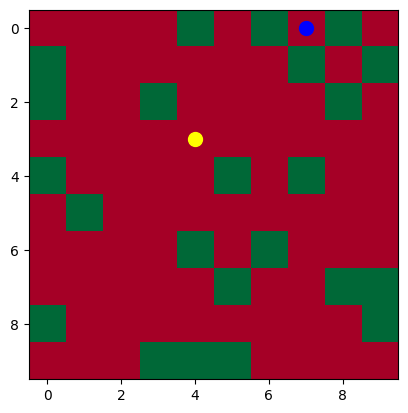

In [19]:
from astar_dataset import plot_instance
import numpy as np
index = 0 + 2500 * 0
print(y[index])
plot_instance(X[index])


In [20]:
import pandas as pd

# Print the statistics of each class label
y_df = pd.DataFrame(y)  # Convert y to a pandas Series if it's not already
y_df.describe()

,0,1,2,3,4
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.201680,0.201680,0.201680,0.201680,0.193280
std,0.401257,0.401257,0.401257,0.401257,0.394873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


The above shows each class label, not how the mean for each label is the same, that means that we have good representation of each class label.